# Table of Contents
 <p><div class="lev1"><a href="#Task-1.-Compiling-Ebola-Data"><span class="toc-item-num">Task 1.&nbsp;&nbsp;</span>Compiling Ebola Data</a></div>
 <div class="lev1"><a href="#Task-2.-RNA-Sequences"><span class="toc-item-num">Task 2.&nbsp;&nbsp;</span>RNA Sequences</a></div>
 <div class="lev1"><a href="#Task-3.-Class-War-in-Titanic"><span class="toc-item-num">Task 3.&nbsp;&nbsp;</span>Class War in Titanic</a></div></p>

In [6]:
# Imports

import glob, ntpath, os
from datetime import datetime
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [7]:
# Custom functions

def read_csvs(dir, regex="*.csv", has_header=True, append_origin=True):
    return read_data_files(dir, regex, pd.read_csv, has_header, append_origin)

def read_excels(dir, regex="*.xls", has_header=True, append_origin=True):
    return read_data_files(dir, regex, pd.read_excel, has_header, append_origin)
    
def read_data_files(dir, regex, func, has_header, append_origin):
    all_files = glob.glob(os.path.join(dir, regex))
    dfs = []
    for file in all_files:
        df = func(file, header=0 if has_header else None)
        if append_origin:
            df['File'] = path_leaf(file)
        dfs.append(df)
    return pd.concat(dfs)

def path_leaf(path):
    head, tail = ntpath.split(path)
    return tail or ntpath.basename(head)

In [4]:
# Converting dates
guinea_df = read_csvs("ebola/guinea_data")
guinea_df['Date'].apply(lambda d: datetime.strptime(d, "%Y-%m-%d"))

liberia_df = read_csvs("ebola/liberia_data")
liberia_df['Date'] = pd.to_datetime(liberia_df['Date'])

sl_df = read_csvs("ebola/sl_data")
sl_df['date'].apply(lambda d: datetime.strptime(d, "%Y-%m-%d"))

#liberia_df = liberia_df.set_index(['Date', 'Variable']).sort_index()


0    2014-09-07
1    2014-09-07
2    2014-09-07
3    2014-09-07
4    2014-09-07
5    2014-09-07
6    2014-09-07
7    2014-09-07
8    2014-09-07
9    2014-09-07
10   2014-09-07
11   2014-09-07
12   2014-09-07
13   2014-09-07
14   2014-09-07
15   2014-09-07
16   2014-09-07
17   2014-09-07
18   2014-09-07
19   2014-09-07
20   2014-09-07
21   2014-09-07
22   2014-09-07
23   2014-09-07
24   2014-09-07
25   2014-09-07
26   2014-09-07
27   2014-09-07
28   2014-09-07
0    2014-10-30
        ...    
36   2014-11-07
0    2014-10-15
1    2014-10-15
2    2014-10-15
3    2014-10-15
4    2014-10-15
5    2014-10-15
6    2014-10-15
7    2014-10-15
8    2014-10-15
9    2014-10-15
10   2014-10-15
11   2014-10-15
12   2014-10-15
13   2014-10-15
14   2014-10-15
15   2014-10-15
16   2014-10-15
17   2014-10-15
18   2014-10-15
19   2014-10-15
20   2014-10-15
21   2014-10-15
22   2014-10-15
23   2014-10-15
24   2014-10-15
25   2014-10-15
26   2014-10-15
27   2014-10-15
28   2014-10-15
Name: date, Length: 3262

## Task 1. Compiling Ebola Data

The `DATA_FOLDER/ebola` folder contains summarized reports of Ebola cases from three countries (Guinea, Liberia and Sierra Leone) during the recent outbreak of the disease in West Africa. For each country, there are daily reports that contain various information about the outbreak in several cities in each country.

Use pandas to import these data files into a single `Dataframe`.
Using this `DataFrame`, calculate for *each country*, the *daily average per month* of *new cases* and *deaths*.
Make sure you handle all the different expressions for *new cases* and *deaths* that are used in the reports.

## Task 2. RNA Sequences

In the `DATA_FOLDER/microbiome` subdirectory, there are 9 spreadsheets of microbiome data that was acquired from high-throughput RNA sequencing procedures, along with a 10<sup>th</sup> file that describes the content of each. 

Use pandas to import the first 9 spreadsheets into a single `DataFrame`.
Then, add the metadata information from the 10<sup>th</sup> spreadsheet as columns in the combined `DataFrame`.
Make sure that the final `DataFrame` has a unique index and all the `NaN` values have been replaced by the tag `unknown`.

In [9]:
metadata = pd.read_excel("microbiome/metadata.xls", header=0, index_col = "BARCODE")
metadata.columns = ['Group', 'Sample origin']
metadata['Sample origin'] = metadata['Sample origin'].fillna("unknown")

microbiome = read_excels("microbiome", regex="MID*.xls",has_header=False)
microbiome.columns = ['Name', 'Occurrence', 'File']
microbiome['Group'] = [metadata.loc[m[2].split(".")[0]]['Group'] for m in microbiome.values]
microbiome['Sample origin'] = [metadata.loc[m[2].split(".")[0]]['Sample origin'] for m in microbiome.values]
microbiome.index = range(0, microbiome.shape[0])

microbiome.head()

,Name,Occurrence,File,Group,Sample origin
0,"Archaea ""Crenarchaeota"" Thermoprotei Desulfuro...",7,MID6.xls,NEC 1,stool
1,"Archaea ""Crenarchaeota"" Thermoprotei Desulfuro...",1,MID6.xls,NEC 1,stool
2,"Archaea ""Crenarchaeota"" Thermoprotei Desulfuro...",1,MID6.xls,NEC 1,stool
3,"Archaea ""Crenarchaeota"" Thermoprotei Desulfuro...",2,MID6.xls,NEC 1,stool
4,"Archaea ""Crenarchaeota"" Thermoprotei Sulfoloba...",5,MID6.xls,NEC 1,stool


## Task 3. Class War in Titanic

Use pandas to import the data file `Data/titanic.xls`. It contains data on all the passengers that travelled on the Titanic.

In [128]:
from IPython.core.display import HTML
HTML(filename='titanic/titanic.html')

Name,Labels,Units,Levels,Storage,NAs
pclass,,,3,integer,0
survived,Survived,,,double,0
name,Name,,,character,0
sex,,,2,integer,0
age,Age,Year,,double,263
sibsp,Number of Siblings/Spouses Aboard,,,double,0
parch,Number of Parents/Children Aboard,,,double,0
ticket,Ticket Number,,,character,0
fare,Passenger Fare,British Pound (\243),,double,1
cabin,,,187,integer,0


For each of the following questions state clearly your assumptions and discuss your findings:
1. Describe the *type* and the *value range* of each attribute. Indicate and transform the attributes that can be `Categorical`. 
2. Plot histograms for the *travel class*, *embarkation port*, *sex* and *age* attributes. For the latter one, use *discrete decade intervals*. 
3. Calculate the proportion of passengers by *cabin floor*. Present your results in a *pie chart*.
4. For each *travel class*, calculate the proportion of the passengers that survived. Present your results in *pie charts*.
5. Calculate the proportion of the passengers that survived by *travel class* and *sex*. Present your results in *a single histogram*.
6. Create 2 equally populated *age categories* and calculate survival proportions by *age category*, *travel class* and *sex*. Present your results in a `DataFrame` with unique index.

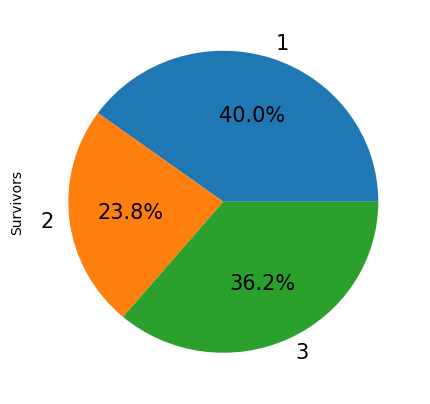

In [237]:
titanic = pd.read_excel("titanic/titanic.xls", header=0)
titanic = titanic.set_index(['name', 'ticket'])
titanic = titanic[['pclass','survived']]
titanic['survived'].replace({0:False, 1:True}, inplace=True)
titanic = titanic[titanic.survived == True]

df = pd.DataFrame(titanic.groupby(titanic.pclass).size().head())
df.index.names = ['Class']
df.columns = ['Survivors']

fig = plt.figure(figsize=(5,5),dpi=100)
ax = plt.subplot(111)
df.plot(kind='pie', y = 'Survivors', ax=ax, autopct='%1.1f%%', legend = False, fontsize=15)